## Widget for interactive presentations of topic models

In this notebook, we show how to turn your results into interactive presentations with the help of widgets. We use: 

  - ipywidgets for the widget
  - matplotlib and plotly for the plots 

which provide a good choice of widgets we can add to our results. Let us say some words regarding these widgets. Why are they useful? 

### Advantages

Widgets give to your results some interactivity, enabling other people to use a widget in order to explore your data and your results. This is a very intersting tool which can be an asset in different contexts, as for example in teaching, or if you have to make a presentation of your results for colleagues, or even for layman people. They can use your widget to see your results moving on a table or on a plot. However, widgets have also some disadvantages

### Disadvantages

The disadvantages of widgets are related to: 

  - the communication of the results themselves: too much interactivity does not automatically improve the communicative power of your analysis. Even worse, it could give the unwanted impression that you want to oversimplify things;
  - to the widgets themselves: if you want to customize widgets, there is a steap learning curve which require to invest time in the understanding of the underlying mechanics of the widgets' libraries in order to get what you want in the end. 
  - your work on the analysis: one of the main disadvantages of widgets is related to the other frameworks which they are depending on -- to design widgets is not really easy and if you want to incorporate custom controls or layouts, you often have to consider studying html, css styling, jinja and other possible languages that have nothing to do with your analysis, but are related to web design. 

So, do widgets worth it? They do if you can keep things relatively simple but efficient, and in this notebook, we show one way to do it. 

## The data

We are taking an example of a topic model analysis with a table and a plot, and we are adding some simple interactivity to them. 

Our data is the result of the topic modelling of articles in newspapers in english covering the progress in the field of nanotechnologies for the medicine. We have tailored these data for processing in MTA, and we have get a best fit result with five topics. Let us load the needed python packages to explore our data and display the results on a plot.

First, we import to needed library for plotting and reading one of our csv file produced by MTA into Python. We are reading this file and show a sample of the data in our table.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import csv
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

df_eng = pd.read_csv('Dominant_Topics_ENG_2.csv')
df_eng.head()

,Unnamed: 0,0,1,2,3,4,Dominant_Topic_NMF
0,2002-03-1-MajAustr-1-67-61.txt,0.734406,0.031050,0.052941,0.121928,0.059674,0
1,2018-01-24-MajAustr-1-67-2.txt,0.627873,0.004257,0.183715,0.125618,0.058536,0
2,2017-11-22-Independent-1-9-4.txt,0.944391,0.000000,0.000000,0.055609,0.000000,0
3,2017-09-27-Times-1-9-4.txt,0.874172,0.000000,0.125828,0.000000,0.000000,0
4,2016-08-7-MajAustr-1-67-26.txt,0.374457,0.008095,0.232753,0.181643,0.203052,0


We want to do some operation to make our table more explicite: 

  - first, rename the columns to reflect their content
  - second, get rid of 'Dominant_Topic_NMF that we don't need here
  - third, create a year column 'Year', a column 'Newspaper'
  - fourth, take from the file title of articles in the column Year only the first fourth letters (the years only), and make it a number (integer type)
  - fifth, take from the file title of articles in the column Newspaper only the letters from position 11 to 14 (the acronym of newspapers only)
  - sixth, sort the dataframe by year and print a head of it

In [4]:
# First step
df_eng.rename(columns={ df_eng.columns[0]: "Articles" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[1]: "Topic_0" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[2]: "Topic_1" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[3]: "Topic_2" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[4]: "Topic_3" }, inplace = True)
df_eng.rename(columns={ df_eng.columns[5]: "Topic_4" }, inplace = True)
# Second step
df_eng.drop('Dominant_Topic_NMF', axis=1, inplace=True)
# Third step
df_eng['Year'] = df_eng['Articles']
df_eng['Newspaper'] = df_eng['Articles']
# Fourth step
df_eng['Year']= df_eng['Year'].map(lambda x: str(x)[0:4])
df_eng['Year'].astype(int)
# Fifth step
df_eng['Newspaper']= df_eng['Newspaper'].map(lambda x: str(x)[11:14])
# Sixth step
df_eng2 = df_eng.sort_values(by='Year',ascending=True)
# Display our reworked table
df_eng2.head()

,Articles,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Year,Newspaper
0,2002-03-1-MajAustr-1-67-61.txt,0.734406,0.031050,0.052941,0.121928,0.059674,2002,ajA
76,2003-07-01-NYTimes-1-7-4.txt,0.759704,0.001919,0.067554,0.170823,0.000000,2003,NYT
75,2004-03-15-MajAustr-1-67-30.txt,0.749237,0.000306,0.125060,0.091593,0.033804,2004,Maj
74,2004-10-11-TorontoS-1-5-3.txt,0.652717,0.105692,0.149433,0.092158,0.000000,2004,Tor
73,2004-12-22-Independent-1-9-5.txt,0.344901,0.118249,0.104265,0.128737,0.303847,2004,Ind


## The plot

Now, let us make a buble chart for that dataframe. A bubble chart is basically a scatter plot where we are ploting the topics on the y axis and the years on the x axis. Because we have five topics, we have to define five element in the plot to print together the five topic on the same plot. Using matplotlib for that task, we can do it like this: 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

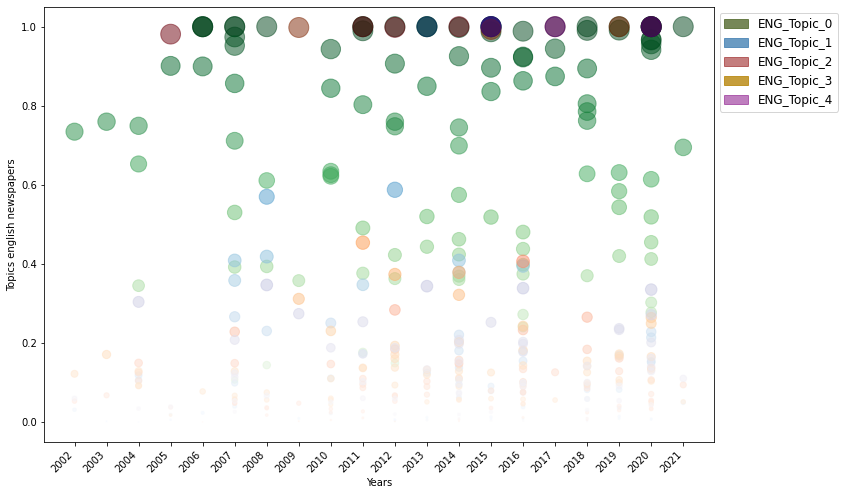

In [5]:
# Define the results corresponding to each topic

ax1 = df_eng2.plot(kind='scatter', x="Year", y="Topic_0", s=df_eng2["Topic_0"] * 400, colormap='Greens', c="Topic_0", colorbar=False, alpha=0.5, label="Topic_0")
ax2 = df_eng2.plot(kind='scatter', x="Year", y="Topic_1", s=df_eng2["Topic_1"] * 400, colormap='Blues', c="Topic_1", colorbar=False, alpha=0.5, ax=ax1, label="Topic_1")
ax3 = df_eng2.plot(kind='scatter', x="Year", y="Topic_2", s=df_eng2["Topic_2"] * 400, colormap='Reds', c="Topic_2", colorbar=False, alpha=0.5, ax=ax1, label="Topic_2")
ax4 = df_eng2.plot(kind='scatter', x="Year", y="Topic_3", s=df_eng2["Topic_3"] * 400, colormap='Oranges', c="Topic_3", colorbar=False, alpha=0.5, label='Topic_3', ax=ax1)
ax5 = df_eng2.plot(kind='scatter', x="Year", y="Topic_4", s=df_eng2["Topic_4"] * 400, colormap='Purples', c="Topic_4", colorbar=False, alpha=0.5, label='Topic_4', ax=ax1)

# Note that ax2 to ax5 depend on ax1 which insure that we are ploting our five axes -- our five topics -- in reference to ax1, and therefore on the same plot

# Now let us add labels for the axis, different colors for each of the topics, as well as a legend with the name of the topics and their corresponding color:

plt.ylabel('Topics english newspapers')
plt.xlabel('Years')

# Our colours identifying the topics are customized like this -- note: alpha is the level of transparency

green_patch = mpatches.Patch(color='darkolivegreen', alpha=0.8, label='ENG_Topic_0')
blue_patch = mpatches.Patch(color='steelblue', alpha=0.8, label='ENG_Topic_1')
red_patch = mpatches.Patch(color='darkred', alpha=0.5, label='ENG_Topic_2')
orange_patch = mpatches.Patch(color='darkgoldenrod', alpha=0.8, label='ENG_Topic_3')
purple_patch = mpatches.Patch(color='purple', alpha=0.5, label='ENG_Topic_4')

# Add a legend to this plot and make the y ticks stay as they are, whereas the x ticks will be turn on 45°

ax1.legend(handles=[green_patch, blue_patch, red_patch, orange_patch, purple_patch], loc=2, prop={'size':12}, bbox_to_anchor=(1,1),ncol=1)
plt.yticks(rotation=0) 
plt.xticks(rotation=45, ha="right") 

This is -- in my view -- a nice plot, and all in all we can be happy with our result. More important bubbles are on the top of the plot, darker and bigger than less important bubbles descending to the bottom of the plot. This gives a nice overview of the importance of our topics and the weight of the articles in the topics, where we can see that our Topic_0 is the most important one. 

Now, let us create widgets to turn our results into interactive results. In order to do that, we need to import the following packages: IPython to display the widgets, ipywidgets to design the widgets, plotly to plot the results with built-in interactive controls, cufflinks to change the style of our plot.

In [6]:
from IPython.display import display, clear_output
import ipywidgets as widgets 
from ipywidgets import interact, Layout, interactive, fixed, interact_manual, IntSlider

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

## Interactive table

One of the things we might want is a widget enabling the filtering of our table with variables of this table. In our case, it could be interesting to filter our table with the value of our topics, to see what are the years related to the highest/lowest values of our topics and/or the related newspapers' categories or the newspapers' articles. Let us do such a widget with the interact decorator (@interact), which implicitly call the funtion show_articles and is a simple and efficient way to build a widget alongside the following steps: 

  - write the interact decorator
  - define your function with following parameters:
    - 'column' which is a list of the topic variables
    - the values of the topic variables in the table, going from 0 to 1
    - a value defining the transition between the values of the topic -- here, we define a transition at 5%

This function return the lines of our table based on the selected topic and a give value of this topic between 0 and 1, as below. 

In [7]:
# Widget to filter table by topic value

@interact
def show_articles(column=['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4'], value=(0, 1, 0.05)):
    return df_eng.loc[df_eng[column] > value]

interactive(children=(Dropdown(description='column', options=('Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Top…

## Sort table with more variables

We can also sort our table with more variables than the topic variables only. For this example, we want to sorte the table by our topics, and also we want to sort it by the year. One way to do it is to display two tables with the same interact decorator:

In [8]:
# Widget to filter table by topic value and years

# First transform the years in the column Year to numbers

df_eng["Year"] = df_eng["Year"].astype(int)

# Then output 

@interact
def filter_topics(topics=['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4'], value=(0, 1, 0.05),
                 year=df_eng["Year"].unique()):
    return df_eng.loc[df_eng[topics] > value], df_eng[df_eng.Year==year]

interactive(children=(Dropdown(description='topics', options=('Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Top…

The output of this interact decorator is too verbose. Thus, let us make two decorators out of it, and as we are on this, let us create a third decorator to filter our table by newspapers' categories:

In [9]:
@interact
def filter_topics(topics=df_eng.select_dtypes('number').columns[0:5], value=(0, 1, 0.05)):
    return df_eng.loc[df_eng[topics] > value]

@interact
def filter_years(year=df_eng["Year"].unique()):
    return df_eng[df_eng.Year==year]

@interact
def filter_newspaper(news=df_eng["Newspaper"].unique()):
    return df_eng[df_eng.Newspaper==news]

interactive(children=(Dropdown(description='topics', options=('Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Top…

interactive(children=(Dropdown(description='year', options=(2002, 2018, 2017, 2016, 2015, 2014, 2021, 2020, 20…

interactive(children=(Dropdown(description='news', options=('ajA', 'Maj', 'Ind', 'Tim', 'NYT', 'ail', 'Dai', '…

We have much pleasant tables, that we can arrange afterwards on a dashboard in order to let others play with the table. We also have the possibility to combine the outputs in one single table with f.ex. here to dropdown boxes for topics and years. Remember, however, that combining widgets is a complicated task and for the presentation of table, such a complexity is not always necessary.

In [10]:
@interact
def filter_topicsyear(topics=['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4'], value=(df_eng["Year"].unique()),
                 ):
    return df_eng[df_eng.Year==value]

interactive(children=(Dropdown(description='topics', options=('Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Top…

## Widgets for plots

Widgets for plots are useful in order to give an interctive view of your plotted results. Let us take a first example of a multiselection widget which enables us to select multiple topics to compare their distribution over time in plot displayed with matplotlib:

In [11]:
# Widget to compare topic distribution over time
opts = list(df_eng2[["Topic_0", "Topic_1", "Topic_2", "Topic_3", "Topic_4"]])

sel_mult = widgets.SelectMultiple(description="Variables",options=opts,value=[opts[1]],disabled=False)

@interact(variables=sel_mult)
def plot_multiple(variables):
    df_eng3 = df_eng.set_index("Year").sort_index(axis=0)
    df_eng3[list(variables)].plot(style=".", ms=20, alpha=0.5)
    plt.title("Topics in time")
    plt.xlabel("Years")
    plt.ylabel("Topics' weight")
    plt.legend(loc=2, prop={'size':12}, bbox_to_anchor=(1,1),ncol=1)

interactive(children=(SelectMultiple(description='Variables', index=(1,), options=('Topic_0', 'Topic_1', 'Topi…

You see a usual scatter plot enabling to compare several topic distribution from 2002 until 2021. You can achieve a similar result with plotly, which has the advantage to display its own widgets and deliver even more informations -- note, we display also two widget in order to choose the layout that you want for your plot (color of background and dots).

In [12]:
# Widgets to see topic distribution over time and changes styles

df_eng2["Year"] = df_eng2["Year"].astype(int)
# find index of 'Year' for x axis
year_index = list(df_eng2.select_dtypes('number').columns)
print(year_index)

@interact
# with year only -- don't output errors if same columns in x and y boxes
def scatter_plot(year=list(df_eng2.select_dtypes('number').columns[5:]), 
                 y=list(df_eng2.select_dtypes('number').columns[0:4]),
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
   
    df_eng2.iplot(kind='scatter', x=year, y=y, mode='markers', opacity=0.75,
             xTitle=year.title(), yTitle=y.title(), 
             title=f'{y.title()} on {year.title()}',
             theme=theme, colorscale=colorscale)

['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Year']


interactive(children=(Dropdown(description='year', options=('Year',), value='Year'), Dropdown(description='y',…

Finally, we introduce a plot crossing the topics distribution over time, as well as the newspapers' categories in our dataset. With the plotly widget, you can then select/deselect the newspapers' categories per mouse clic in order to see their contribution to one topic and to the distribution of this topic in time.

In [13]:
# Widget to filter the topics distribution over time by newspapers' categories
import plotly.express as px
print(df_eng2["Newspaper"].unique())
# Define color discrete map for the newspapers' categories (hex code for colors)
color_discrete_map = {'ajA': '#002b36', 'NYT': '#586e75', 'Maj': '#657b83', 'Tor': '#839496', 'Ind': '#93a1a1', 'Tim': '#fdf6e3', 'Dai': '#b58900', 'Gua': '#cb4b16', 'Bus': '#d30102', 'ail': '#d33682', 'CDa': '#268bd2'}

@interact
# with year only
def scatter_plot(x=list(df_eng2.select_dtypes('number').columns[5:]), 
                 y=list(df_eng2.select_dtypes('number').columns[0:4])):
                #theme=list(cf.themes.THEMES.keys()), 
                 #colorscale=list(cf.colors._scales_names.keys())):

# with all integer categories in 'x' and 'y'
#def scatter_plot(x=list(df_eng2.select_dtypes('number').columns), 
#                 y=list(df_eng2.select_dtypes('number').columns),
#                 theme=list(cf.themes.THEMES.keys()), 
#                 colorscale=list(cf.colors._scales_names.keys())):
    
    
    fig=px.scatter(df_eng2, x=x, y=y, color="Newspaper", 
             opacity=0.5,
             #trendline="rolling",
             #trendline_options=dict(window=2),
             color_discrete_map=color_discrete_map)
    fig.update_traces(marker=dict(size=15))
    fig.show()

['ajA' 'NYT' 'Maj' 'Tor' 'Ind' 'Tim' 'Dai' 'Gua' 'Bus' 'ail' 'CDa']


interactive(children=(Dropdown(description='x', options=('Year',), value='Year'), Dropdown(description='y', op…